In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from nilearn import image, plotting
from scipy.spatial.distance import euclidean, correlation,squareform
from tqdm import tqdm
from nilearn.glm.thresholding import threshold_stats_img
from os.path import join as opj
import json

/home/javi/Documentos/software/nilearn/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
final_subjects = np.loadtxt("../data/subjects_intersect_motion_035.txt")
mask_img = "../data/masks/grey_mask_motion_035.nii.gz"

with open("../results/second-level/node/task-stroop/Incongruent-Congruent/peaks.json", "r") as f:
    peaks_stroop = json.load(f)
print(peaks_stroop)

with open("../results/second-level/node/task-msit/Incongruent-Congruent/peaks.json", "r") as f:
    peaks_msit = json.load(f)
print(peaks_msit)

{'positive': [-42.04899883270264, 5.229002952575684, 29.5], 'negative': [-0.40999794006347656, 46.868003845214844, -12.5]}
{'positive': [2.793002128601074, -65.23699855804443, -21.5], 'negative': [-3.6129980087280273, 46.868003845214844, -12.5]}


In [3]:
def load_results(task_id, 
                 peak_type, 
                 contrast, 
                 mask_img, 
                 height_control="fdr", 
                 alpha = 0.05, 
                 cluster_threshold = 50):
    
    base_dir = opj("../results/second-level/edge/seed/task-%s" % task_id, peak_type, contrast)
    
    res_second = dict()
    for name in ["stat", "z_score", "p_value"]:
        res_second[name] = image.load_img(opj(base_dir, "%s.nii.gz" % name))
        
    z_thr, thr = threshold_stats_img(res_second["z_score"],  
                                     mask_img = mask_img,
                                     height_control = height_control,
                                     alpha = alpha,
                                     cluster_threshold = cluster_threshold)
    res_second['z_score_thr'] = z_thr
    
    res_second['stat_thr'] = image.math_img("img1*(abs(img2) > %f)" % thr, 
                                            img1 = res_second["stat"], 
                                            img2 = res_second["z_score"])    
    return res_second

In [4]:
stroop_second_positive = load_results(task_id = "stroop", 
                                      peak_type = "positive",
                                      contrast = "Incongruent-Congruent",
                                      mask_img = mask_img)

stroop_second_negative = load_results(task_id = "stroop", 
                                      peak_type = "negative",
                                      contrast = "Incongruent-Congruent",
                                      mask_img = mask_img)

msit_second_positive = load_results(task_id = "msit", 
                                      peak_type = "positive",
                                      contrast = "Incongruent-Congruent",
                                      mask_img = mask_img)

msit_second_negative = load_results(task_id = "msit", 
                                      peak_type = "negative",
                                      contrast = "Incongruent-Congruent",
                                      mask_img = mask_img)

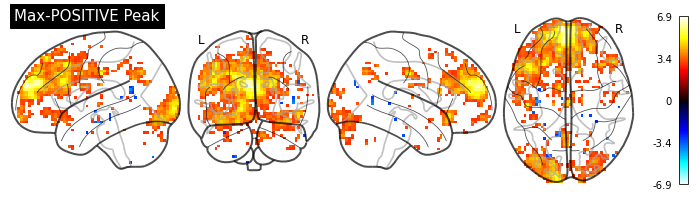

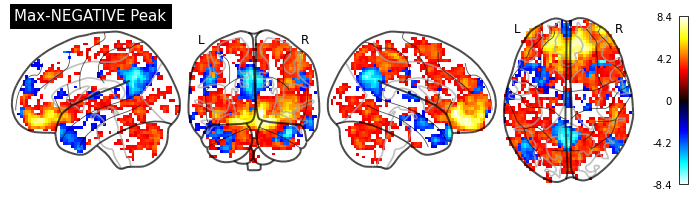

In [16]:
plotting.plot_glass_brain(stroop_second_positive['stat_thr'], 
                          colorbar = True, 
                          cmap = plotting.cm.cold_hot, 
                          plot_abs=False,
                          display_mode ="lyrz",
                          title = "Max-POSITIVE Peak")
plt.savefig("../plots/second-level/edge/seed/task-stroop/edge_seed_positive_fdr05_k50.png", dpi = 300)
plt.savefig("../plots/second-level/edge/seed/task-stroop/edge_seed_positive_fdr05_k50.svg", dpi = 300)
plt.savefig("../plots/second-level/edge/seed/task-stroop/edge_seed_positive_fdr05_k50.pdf", dpi = 300)

plotting.plot_glass_brain(stroop_second_negative['stat_thr'], 
                          colorbar = True, 
                          cmap = plotting.cm.cold_hot, 
                          plot_abs=False,
                          display_mode ="lyrz",
                          title = "Max-NEGATIVE Peak")
plt.savefig("../plots/second-level/edge/seed/task-stroop/edge_seed_negative_fdr05_k50.png", dpi = 300)
plt.savefig("../plots/second-level/edge/seed/task-stroop/edge_seed_negative_fdr05_k50.svg", dpi = 300)
plt.savefig("../plots/second-level/edge/seed/task-stroop/edge_seed_negative_fdr05_k50.pdf", dpi = 300)

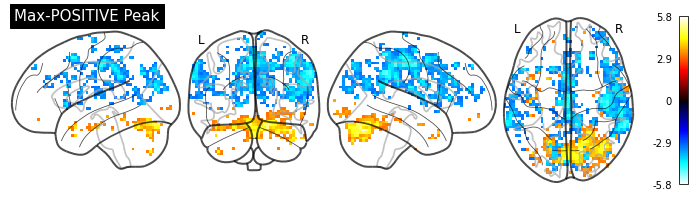

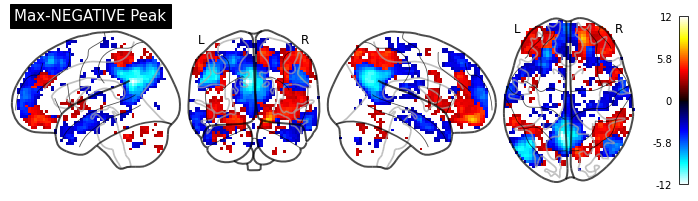

In [17]:
plotting.plot_glass_brain(msit_second_positive['stat_thr'], 
                          colorbar = True, 
                          cmap = plotting.cm.cold_hot, 
                          plot_abs=False,
                          display_mode ="lyrz",
                          title = "Max-POSITIVE Peak")
plt.savefig("../plots/second-level/edge/seed/task-msit/edge_seed_positive_fdr05_k50.png", dpi = 300)
plt.savefig("../plots/second-level/edge/seed/task-msit/edge_seed_positive_fdr05_k50.svg", dpi = 300)
plt.savefig("../plots/second-level/edge/seed/task-msit/edge_seed_positive_fdr05_k50.pdf", dpi = 300)

plotting.plot_glass_brain(msit_second_negative['stat_thr'], 
                          colorbar = True, 
                          cmap = plotting.cm.cold_hot, 
                          plot_abs=False,
                          display_mode ="lyrz",
                          title = "Max-NEGATIVE Peak")
plt.savefig("../plots/second-level/edge/seed/task-msit/edge_seed_negative_fdr05_k50.png", dpi = 300)
plt.savefig("../plots/second-level/edge/seed/task-msit/edge_seed_negative_fdr05_k50.svg", dpi = 300)
plt.savefig("../plots/second-level/edge/seed/task-msit/edge_seed_negative_fdr05_k50.pdf", dpi = 300)